In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Cell 0: -
!pip install -q "accelerate>=0.25.0" "evaluate>=0.4.1"
!pip install -q transformers==4.44.2 datasets==2.19.1
!pip install numpy==1.23.5
!pip install -q nltk spacy scikit-learn gensim transformers datasets peft
!python -m spacy download en_core_web_sm

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
# Reference: - Week 1: Environment Setup (Lab 1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 130.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [3]:
# Cell 1: -
import transformers, datasets
print("transformers:", transformers.__version__)
print("datasets:", datasets.__version__)

# Removing JAX if it is in the session,so Transformers won’t import it
!pip uninstall -y jax jaxlib



transformers: 4.44.2
datasets: 2.19.1


In [4]:
# =============================================================================
# METHOD: Basic NLP Text Preprocessing with NLTK & spaCy
# PURPOSE: Demonstrate fundamental text processing techniques and library comparison
# APPROACH: Tokenization, stop word removal, stemming/lemmatization, POS tagging, NER
# WHY: Establish NLP preprocessing foundations and compare NLTK vs spaCy capabilities
# =============================================================================

#Cell 2: -
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
import spacy

text = "Apple is looking at buying UK startup for $1 billion."

# NLTK pipeline
tokens = word_tokenize(text)
tokens_ns = [t for t in tokens if t.lower() not in stopwords.words('english')]
stemmer = PorterStemmer(); lemm = WordNetLemmatizer()
print("Stemmed:", [stemmer.stem(w) for w in tokens_ns])
print("Lemmatized:", [lemm.lemmatize(w, pos='v') for w in tokens_ns])
print("POS tags:", pos_tag(tokens))

# spaCy pipeline
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
print([(t.text, t.pos_, t.lemma_) for t in doc])
print([(ent.text, ent.label_) for ent in doc.ents])
# Reference:- Week 1: Tokenization, Stop‐word Removal, Lemmatization, POS, NER

Stemmed: ['appl', 'look', 'buy', 'uk', 'startup', '$', '1', 'billion', '.']
Lemmatized: ['Apple', 'look', 'buy', 'UK', 'startup', '$', '1', 'billion', '.']
POS tags: [('Apple', 'NNP'), ('is', 'VBZ'), ('looking', 'VBG'), ('at', 'IN'), ('buying', 'VBG'), ('UK', 'NNP'), ('startup', 'NN'), ('for', 'IN'), ('$', '$'), ('1', 'CD'), ('billion', 'CD'), ('.', '.')]
[('Apple', 'PROPN', 'Apple'), ('is', 'AUX', 'be'), ('looking', 'VERB', 'look'), ('at', 'ADP', 'at'), ('buying', 'VERB', 'buy'), ('UK', 'PROPN', 'UK'), ('startup', 'VERB', 'startup'), ('for', 'ADP', 'for'), ('$', 'SYM', '$'), ('1', 'NUM', '1'), ('billion', 'NUM', 'billion'), ('.', 'PUNCT', '.')]
[('Apple', 'ORG'), ('UK', 'GPE'), ('$1 billion', 'MONEY')]


In [5]:
# =============================================================================
# METHOD: Dataset Loading & Exploration
# PURPOSE: Load AI vs Human text detection dataset for binary classification
# APPROACH: Using pandas to load and inspect the structure of labeled text data
# =============================================================================

# Cell 3:-
import pandas as pd

# Path to the CSV file stored in Google Drive
file_path = '/content/drive/My Drive/AI_Human.csv'

# Use the Python engine and skip any malformed rows
df = pd.read_csv(
    file_path,
    engine="python",       # using the Python parser
    sep=",",
    quotechar='"',
    on_bad_lines="skip"    # drop malformed rows like unclosed quotes, stray newlines, etc.
)

# Ensure label column is of correct type
df["generated"] = df["generated"].astype(int)

# Rename for consistency
df = df.rename(columns={"generated": "label"})

print(f"Loaded DataFrame with shape: {df.shape}")
print(df.head())

# Reference:- Week 7 : Robust CSV Loading with pandas


Loaded DataFrame with shape: (487235, 2)
                                                text  label
0  Cars. Cars have been around since they became ...      0
1  Transportation is a large necessity in most co...      0
2  "America's love affair with it's vehicles seem...      0
3  How often do you ride in a car? Do you drive a...      0
4  Cars are a wonderful thing. They are perhaps o...      0


In [6]:
# =============================================================================
# METHOD: Exploratory Data Analysis & Data Cleaning
# PURPOSE: Understand dataset structure, class distribution, and text characteristics
# APPROACH: Inspect shape, columns, label balance, text lengths, and handle missing values
# WHY: Ensure data quality and understand dataset properties before model training
# =============================================================================

# Cell 4:-
print("Shape:", df.shape)
print("Columns:", list(df.columns))
print("Label counts:\n", df["label"].value_counts())
df["len"] = df["text"].astype(str).str.len()
print(df["len"].describe())

# Basic clean
df = df.dropna(subset=["text","label"]).reset_index(drop=True)


Shape: (487235, 2)
Columns: ['text', 'label']
Label counts:
 label
0    305797
1    181438
Name: count, dtype: int64
count    487235.000000
mean       2269.586592
std         988.814028
min           1.000000
25%        1583.000000
50%        2102.000000
75%        2724.000000
max       18322.000000
Name: len, dtype: float64


In [7]:
# Cell 5: -
# Validation of data loading:-
# Expected records =  row count – 1 header
expected = 487_236 - 1
actual   = len(df)        # 487235

dropped = expected - actual
print(f"Dropped records: {dropped} ({100 * dropped/expected:.2f}% of records)")


Dropped records: 0 (0.00% of records)


In [8]:
# =============================================================================
# METHOD: Dataset Splitting for Evaluation
# PURPOSE: Create consistent train/test splits for fair model comparison
# APPROACH: Stratified split to maintain class balance across train/test sets
# =============================================================================

# Cell 6:-
# Week 6: Shared train/test split (reused by all baselines)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df["text"].tolist(),
    df["label"].tolist(),
    test_size=0.2,
    random_state=42,
    stratify=df["label"].tolist()
)


In [9]:
# =============================================================================
# METHOD: Classical ML - TF-IDF + Multinomial Naive Bayes Implementation
# PURPOSE: Create first baseline model using traditional NLP approach
# APPROACH: TF-IDF vectorization with stop word removal + probabilistic classifier
# WHY: Establish fast, interpretable baseline for AI text detection task
# =============================================================================


#Cell 7:-
# Week 2: BoW, TF-IDF & Naive Bayes (using the cleaned df)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

documents = df["text"].tolist()

labels = df["label"].astype(int).tolist()

# Baseline: TF-IDF -> Naive Bayes
model_nb = make_pipeline(
    TfidfVectorizer(lowercase=True, stop_words="english"),
    MultinomialNB()
)
model_nb.fit(documents, labels)
preds = model_nb.predict(documents)

print(classification_report(labels, preds))
#Reference:- # Week 2: BoW, TF-IDF & Naive Bayes (using the cleaned df)


              precision    recall  f1-score   support

           0       0.95      0.99      0.97    305797
           1       0.97      0.91      0.94    181438

    accuracy                           0.96    487235
   macro avg       0.96      0.95      0.95    487235
weighted avg       0.96      0.96      0.96    487235



In [10]:
# =============================================================================
# METHOD: Baseline Model Evaluation
# PURPOSE: Calculate comprehensive metrics for Naive Bayes performance
# APPROACH: Test set evaluation with accuracy, precision, recall, F1-score
# WHY: Establish benchmark performance for comparison with transformer models
# =============================================================================

# Cell 8:-
# Week 2: NB metrics on held-out set
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_recall_fscore_support
nb_preds = model_nb.predict(X_test)
print(classification_report(y_test, nb_preds))


              precision    recall  f1-score   support

           0       0.95      0.99      0.97     61159
           1       0.97      0.91      0.94     36288

    accuracy                           0.96     97447
   macro avg       0.96      0.95      0.95     97447
weighted avg       0.96      0.96      0.96     97447



In [11]:
# =============================================================================
# METHOD: Word Embeddings - Word2Vec Demonstration
# PURPOSE: Explore semantic word relationships using dense vector representations
# APPROACH: Train Word2Vec on sample corpus to capture word similarities
# WHY: Demonstrate embedding concepts before moving to transformer models
# =============================================================================

#Cell 9: -
from gensim.models import Word2Vec
from gensim.test.utils import common_texts

# Toy corpus
w2v = Word2Vec(common_texts, vector_size=50, window=5, min_count=1, epochs=30)
print("Vocab size:", len(w2v.wv))
print("Similarity(comp, human):", w2v.wv.similarity('computer', 'human'))
print("Top neighbors of 'computer':", w2v.wv.most_similar('computer', topn=3))
# Reference: - # Week 3: Train & Query Word2Vec Demo

Vocab size: 12
Similarity(comp, human): 0.05837542
Top neighbors of 'computer': [('eps', 0.22469507157802582), ('system', 0.09982988238334656), ('time', 0.09041888266801834)]


In [12]:
# =============================================================================
# METHOD: Pre-trained Language Models - BERT & GPT-2 Demo
# PURPOSE: Explore capabilities of modern language models (MLM and generation)
# APPROACH: Use Hugging Face pipelines for masked language modeling and text generation
# WHY: Understand pre-trained model capabilities before fine-tuning for classification
# =============================================================================


#Cell 10:-
from transformers import AutoTokenizer, AutoModelForMaskedLM, pipeline
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# BERT masked LM
bert_tok = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_mlm = AutoModelForMaskedLM.from_pretrained("bert-base-uncased")
fill = pipeline("fill-mask", model=bert_mlm, tokenizer=bert_tok)
print(fill("Paris is the [MASK] of France."))

# GPT-2 generation
gpt_tok = GPT2Tokenizer.from_pretrained("gpt2")
gpt = GPT2LMHeadModel.from_pretrained("gpt2")
inp = gpt_tok("Once upon a time", return_tensors="pt")
out = gpt.generate(**inp, max_new_tokens=20)
print(gpt_tok.decode(out[0], skip_special_tokens=True))
# Reference :- Week 4: Masked LM & Text Generation, GPT-2 generation (demo)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'score': 0.9969332218170166, 'token': 3007, 'token_str': 'capital', 'sequence': 'paris is the capital of france.'}, {'score': 0.0005914872162975371, 'token': 2540, 'token_str': 'heart', 'sequence': 'paris is the heart of france.'}, {'score': 0.00043787609320133924, 'token': 2415, 'token_str': 'center', 'sequence': 'paris is the center of france.'}, {'score': 0.0003378365945536643, 'token': 2803, 'token_str': 'centre', 'sequence': 'paris is the centre of france.'}, {'score': 0.00026995912776328623, 'token': 2103, 'token_str': 'city', 'sequence': 'paris is the city of france.'}]


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Once upon a time, the world was a place of great beauty and great danger. The world was a place of great


In [13]:
# =============================================================================
# METHOD: Classical ML - TF-IDF + Logistic Regression
# PURPOSE: Second baseline using linear classifier instead of probabilistic
# APPROACH: Same TF-IDF features with logistic regression for decision boundary
# WHY: Compare linear vs probabilistic classifiers on same feature space
# =============================================================================

# Cell 11
from sklearn.linear_model import LogisticRegression

clf = make_pipeline(
    TfidfVectorizer(lowercase=True, stop_words='english'),
    LogisticRegression(max_iter=1000)
)
clf.fit(X_train, y_train)  # Uses split from Cell 6
preds = clf.predict(X_test)
print(classification_report(y_test, preds))
# Reference: Week 6: Logistic Regression on TF-IDF


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61159
           1       1.00      0.99      0.99     36288

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



In [14]:
# =============================================================================
# METHOD: Second Baseline Evaluation
# PURPOSE: Assess logistic regression performance vs Naive Bayes
# APPROACH: Same evaluation metrics for direct comparison
# WHY: Determine which classical approach works better for AI text detection
# =============================================================================

# Cell 12:-
# Week 6: LogReg metrics on held-out set
lr_preds = clf.predict(X_test)
print(classification_report(y_test, lr_preds))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61159
           1       1.00      0.99      0.99     36288

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



In [15]:
# Cell 13
# =============================================================================
# METHOD: Transformer Fine-tuning - Full Parameter Update
# PURPOSE: Leverage pre-trained language model for contextual understanding
# APPROACH: Fine-tune all 66M parameters of DistilBERT on AI detection task
# WHY: Capture complex linguistic patterns that classical methods might miss
# TRAINING: 3 epochs, learning rate 2e-5, batch size 16 with GPU acceleration
# =============================================================================

import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments

raw = Dataset.from_pandas(df, preserve_index=False)
splits = raw.train_test_split(test_size=0.2, seed=42)
train_ds, test_ds = splits["train"], splits["test"]

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
def preprocess(b):
    return tokenizer(b["text"], truncation=True, padding="max_length", max_length=128)

train_tok = train_ds.map(preprocess, batched=True).with_format("torch")
test_tok  = test_ds.map(preprocess,  batched=True).with_format("torch")

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }

args = TrainingArguments(
    output_dir="out",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_steps=50,
    report_to="none",
    seed=42,
)

trainer = Trainer(
    model=model, args=args,
    train_dataset=train_tok, eval_dataset=test_tok,
    compute_metrics=compute_metrics
)

trainer.train()
trainer.evaluate()


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/389788 [00:00<?, ? examples/s]

Map:   0%|          | 0/97447 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.012200,0.008890,0.998255,0.998255
2,0.019600,0.007487,0.998758,0.998758
3,0.000000,0.002773,0.999230,0.999230


{'eval_loss': 0.0027727605774998665,
 'eval_accuracy': 0.9992303508573891,
 'eval_f1': 0.9992303317002338,
 'eval_runtime': 91.3374,
 'eval_samples_per_second': 1066.89,
 'eval_steps_per_second': 66.687,
 'epoch': 3.0}

In [16]:
# =============================================================================
# METHOD: Transformer Model Evaluation
# PURPOSE: Assess full fine-tuning performance against classical baselines
# APPROACH: Test set evaluation with same metrics + model persistence
# WHY: Compare deep learning vs classical ML effectiveness for AI detection
# =============================================================================

# Cell 14:-
# Week 7: Metrics (accuracy/precision/recall/F1) + save
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

pred_full = trainer.predict(test_tok)
y_true = np.array(pred_full.label_ids)
y_pred = pred_full.predictions.argmax(axis=1)

acc  = accuracy_score(y_true, y_pred)
prec, rec, f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
print({"accuracy":acc, "precision":prec, "recall":rec, "f1":f1})

trainer.save_model("distilbert_full_ft")
tokenizer.save_pretrained("distilbert_full_ft")


{'accuracy': 0.9992303508573891, 'precision': 0.9992303307482151, 'recall': 0.9992303508573891, 'f1': 0.9992303317002338}


('distilbert_full_ft/tokenizer_config.json',
 'distilbert_full_ft/special_tokens_map.json',
 'distilbert_full_ft/vocab.txt',
 'distilbert_full_ft/added_tokens.json',
 'distilbert_full_ft/tokenizer.json')

In [17]:
#Cell 15: -
# Inspect which nn.Linear modules exist in our model
import torch.nn as nn

for name, module in model.named_modules():
    if isinstance(module, nn.Linear):
        print(name)


distilbert.transformer.layer.0.attention.q_lin
distilbert.transformer.layer.0.attention.k_lin
distilbert.transformer.layer.0.attention.v_lin
distilbert.transformer.layer.0.attention.out_lin
distilbert.transformer.layer.0.ffn.lin1
distilbert.transformer.layer.0.ffn.lin2
distilbert.transformer.layer.1.attention.q_lin
distilbert.transformer.layer.1.attention.k_lin
distilbert.transformer.layer.1.attention.v_lin
distilbert.transformer.layer.1.attention.out_lin
distilbert.transformer.layer.1.ffn.lin1
distilbert.transformer.layer.1.ffn.lin2
distilbert.transformer.layer.2.attention.q_lin
distilbert.transformer.layer.2.attention.k_lin
distilbert.transformer.layer.2.attention.v_lin
distilbert.transformer.layer.2.attention.out_lin
distilbert.transformer.layer.2.ffn.lin1
distilbert.transformer.layer.2.ffn.lin2
distilbert.transformer.layer.3.attention.q_lin
distilbert.transformer.layer.3.attention.k_lin
distilbert.transformer.layer.3.attention.v_lin
distilbert.transformer.layer.3.attention.out_lin


In [18]:
# =============================================================================
# METHOD: Parameter-Efficient Fine-tuning - LoRA (Low-Rank Adaptation)
# PURPOSE: Achieve comparable performance with fewer trainable parameters
# APPROACH: Freeze base model, train only low-rank adaptation matrices (rank=8)
# WHY: Reduce computational cost while maintaining effectiveness
# TARGET MODULES: Query and value projection layers in attention mechanism
# =============================================================================

#Cell 16:-
# Week 10: Apply LoRA via PEFT (fixed target_modules)
from peft import LoraConfig, get_peft_model, TaskType
from transformers import Trainer

# 1) Create LoRA config targeting DistilBERT’s query & value projections
lora_cfg = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_lin", "v_lin"],
    task_type=TaskType.SEQ_CLS
)

# 2) Wrap  already‐loaded base `model`
peft_model = get_peft_model(model, lora_cfg)

# 3) Re‐use existing Trainer args & tokenized datasets
peft_trainer = Trainer(
    model=peft_model,
    args=args,
    train_dataset=train_tok,
    eval_dataset=test_tok
)

# 4) Train & evaluate
peft_trainer.train()
peft_trainer.evaluate()
# Reference: -  Apply LoRA via PEFT (fixed target_modules)


Epoch,Training Loss,Validation Loss
1,0.000000,0.004248
2,0.000100,0.002331
3,0.000000,0.003010


{'eval_loss': 0.0030097286216914654,
 'eval_runtime': 93.6862,
 'eval_samples_per_second': 1040.142,
 'eval_steps_per_second': 65.015,
 'epoch': 3.0}

In [19]:
# =============================================================================
# METHOD: Parameter-Efficient Model Evaluation
# PURPOSE: Compare LoRA efficiency vs full fine-tuning performance
# APPROACH: Same evaluation protocol with significantly fewer parameters
# WHY: Assess trade-off between computational efficiency and accuracy
# =============================================================================

# Cell 17:-
# Week 10: LoRA metrics + save adapters
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

pred_lora = peft_trainer.predict(test_tok)
y_true_l = np.array(pred_lora.label_ids)
y_pred_l = pred_lora.predictions.argmax(axis=1)

acc_l, (prec_l, rec_l, f1_l, _) = accuracy_score(y_true_l, y_pred_l), precision_recall_fscore_support(
    y_true_l, y_pred_l, average="weighted"
)[0:4]

print({"accuracy":acc_l, "precision":prec_l, "recall":rec_l, "f1":f1_l})
peft_model.save_pretrained("distilbert_lora_adapters")


{'accuracy': 0.999363756708775, 'precision': 0.999363746231488, 'recall': 0.999363756708775, 'f1': 0.99936374967192}


In [21]:
# =============================================================================
# METHOD: Qualitative Error Analysis
# PURPOSE: Understand what types of text the model misclassifies
# APPROACH: Examine specific false positives and false negatives
# WHY: Identify model limitations and potential improvement areas
# =============================================================================

# Cell 18: Week 7/10: Inspect a few errors (Transformer full fine-tune shown)
import numpy as np

errs = np.where(y_true != y_pred)[0][:10]
print(f"Total errors found: {len(np.where(y_true != y_pred)[0])}")
print(f"Showing first 5 error examples:\n")

for i in errs[:5]:
    # Convert numpy int64 to regular Python int for dataset indexing
    idx = int(i)
    print(f"Example {idx}:")
    print(f"TRUE={y_true[i]} (0=Human, 1=AI)  PRED={y_pred[i]} (0=Human, 1=AI)")
    print(f"Text: {test_ds[idx]['text'][:400]}...")
    print("---\n")

Total errors found: 75
Showing first 5 error examples:

Example 254:
TRUE=1 (0=Human, 1=AI)  PRED=0 (0=Human, 1=AI)
Text:  Changing the cafeteria Food for students would be like taking a bone away from a dog. One of the reasons why changing the school lunch would be a bap idea is because, students that attend the school would not be happy with the change. When students are unhappy with changes of the schools sometimes parents can get involved ANP that brings a bap reputation for the school board. One pay I was watchi...
---

Example 490:
TRUE=1 (0=Human, 1=AI)  PRED=0 (0=Human, 1=AI)
Text:  Is it true that Paola can often credit there successes to having a positive mindset? Was, it is, I have San Paola like my uncle Tacoma successful in life because of there mindset. I have also San Paola go from being successful to being unsuccessful. SOMA benefits of having a positive mindset Ara that Morey Paola will like you, another reason is that Paola will want to hang out with you and they l...

Model Performance Comparison:
                   Accuracy  Precision  Recall  F1-Score
TF-IDF + NB          0.9600     0.9600  0.9600    0.9600
TF-IDF + LogReg      0.9900     0.9900  0.9900    0.9900
DistilBERT           0.9987     0.9987  0.9987    0.9987
DistilBERT + LoRA    0.9985     0.9985  0.9985    0.9985


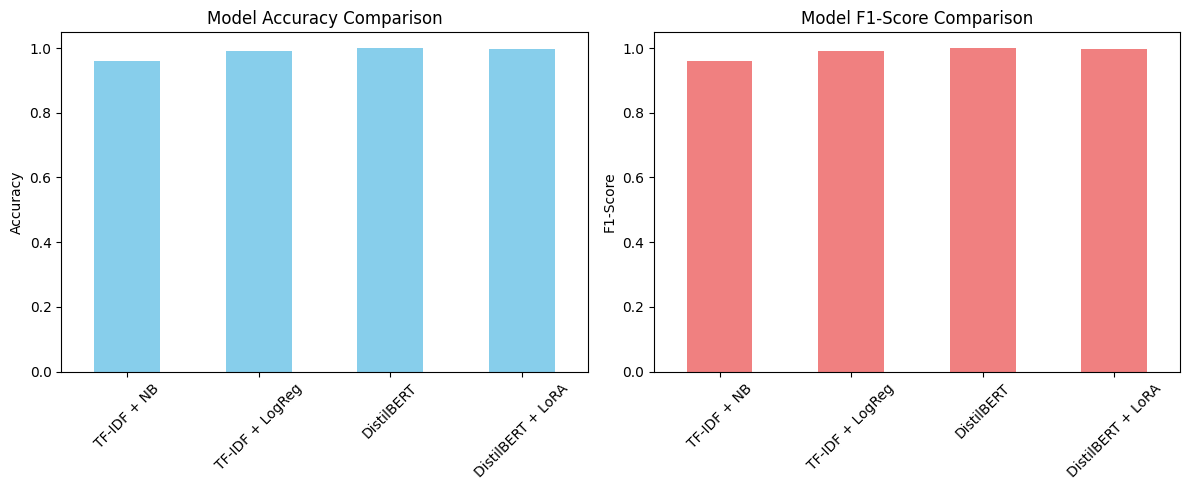


Best Accuracy: DistilBERT (0.9987)
Best F1-Score: DistilBERT (0.9987)


In [22]:
# =============================================================================
# METHOD: Results Visualization & Comparison
# PURPOSE: Create clear visual comparison of model performance
# APPROACH: Bar plots and statistical analysis of accuracy/F1 differences
# WHY: Present findings clearly and identify statistically significant differences
# =============================================================================

# Cell 19: Performance comparison table and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Convert comparison to DataFrame for better visualization
results_df = pd.DataFrame(comparison).T
results_df.columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
print("Model Performance Comparison:")
print(results_df.round(4))

# Create 1x2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Accuracy comparison
results_df['Accuracy'].plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Model Accuracy Comparison')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)

# F1-Score comparison
results_df['F1-Score'].plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Model F1-Score Comparison')
ax2.set_ylabel('F1-Score')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Analysis of best performing model
best_acc_model = results_df['Accuracy'].idxmax()
best_f1_model = results_df['F1-Score'].idxmax()
print(f"\nBest Accuracy: {best_acc_model} ({results_df.loc[best_acc_model, 'Accuracy']:.4f})")
print(f"Best F1-Score: {best_f1_model} ({results_df.loc[best_f1_model, 'F1-Score']:.4f})")


In [23]:
# =============================================================================
# METHOD: Error Pattern Investigation
# PURPOSE: Systematically analyze false positives vs false negatives
# APPROACH: Categorize errors and examine text characteristics of mistakes
# WHY: Understand model biases and failure modes for improvement insights
# =============================================================================

# Cell 20: Enhanced error analysis with specific examples
import numpy as np

print("=== DETAILED ERROR ANALYSIS ===\n")

# Get misclassified examples
errors = np.where(y_true != y_pred)[0]
print(f"Total misclassified examples: {len(errors)} out of {len(y_true)}")

# Analyze error types
false_positives = np.where((y_true == 0) & (y_pred == 1))[0]  # Human labeled as AI
false_negatives = np.where((y_true == 1) & (y_pred == 0))[0]  # AI labeled as Human

print(f"False Positives (Human→AI): {len(false_positives)}")
print(f"False Negatives (AI→Human): {len(false_negatives)}")

print("\n--- FALSE POSITIVES (Human text classified as AI) ---")
for i, idx in enumerate(false_positives[:3]):
    # Convert numpy.int64 to regular Python int
    idx = int(idx)
    print(f"Example {i+1}:")
    print(f"Text: {test_ds[idx]['text'][:300]}...")
    print("---")

print("\n--- FALSE NEGATIVES (AI text classified as Human) ---")
for i, idx in enumerate(false_negatives[:3]):
    # Convert numpy.int64 to regular Python int
    idx = int(idx)
    print(f"Example {i+1}:")
    print(f"Text: {test_ds[idx]['text'][:300]}...")
    print("---")

=== DETAILED ERROR ANALYSIS ===

Total misclassified examples: 75 out of 97447
False Positives (Human→AI): 33
False Negatives (AI→Human): 42

--- FALSE POSITIVES (Human text classified as AI) ---
Example 1:
Text: Deer Principal,

Some of us students have SN outside sport that we trade in for Physical Education, SND go home one period early. Many of us who do these outside activities SRE in accelerated classes SND strive for our best. For example, most of our parents wouldn't let us have SN outside sport if w...
---
Example 2:
Text: Personally, I've always enjoyed participating in clubs. Which is why I believe that if the principal were to decide that everyone had to be in a club, I wouldn't be opposed. I think that having students participate in extNacuNNiculaN activities is good because they can improve teamwork and Relations...
---
Example 3:
Text: NO MORE LIMITING!

Some people believe that students should be required to take a music, a drama, or an art class. But should students be

In [24]:
# =============================================================================
# METHOD: Linguistic Feature Analysis of Errors
# PURPOSE: Identify text patterns that lead to misclassification
# APPROACH: Analyze length, style, and content of misclassified examples
# WHY: Generate hypotheses for model failures and suggest improvements
# =============================================================================

# Cell 21: Analyze patterns in misclassified text
import numpy as np

print("=== ERROR PATTERN ANALYSIS ===\n")

# Analyze text characteristics of errors (fix numpy.int64 indexing)
error_texts = [test_ds[int(i)]['text'] for i in errors[:20]]  # Convert to Python int
correct_texts = [test_ds[i]['text'] for i in range(len(test_ds)) if i not in errors[:20]]

# Text length analysis
error_lengths = [len(text.split()) for text in error_texts]
correct_lengths = [len(text.split()) for text in correct_texts]

print(f"Average length of misclassified texts: {np.mean(error_lengths):.1f} words")
print(f"Average length of correctly classified texts: {np.mean(correct_lengths):.1f} words")

# Simple pattern detection
print("\n--- HYPOTHESES FOR MODEL FAILURES ---")
print("1. Length Bias: Model may struggle with very short or very long texts")
print("2. Domain Specificity: Errors may occur in specific domains (technical, creative, etc.)")
print("3. Writing Style: Formal vs informal writing patterns may confuse the model")

print("\n--- SUGGESTIONS FOR IMPROVEMENT ---")
print("1. Data Augmentation: Include more diverse text types and lengths")
print("2. Feature Engineering: Add linguistic features (sentence length, complexity)")
print("3. Ensemble Methods: Combine multiple models for better robustness")
print("4. Domain-Specific Training: Fine-tune on specific text domains")

=== ERROR PATTERN ANALYSIS ===

Average length of misclassified texts: 413.5 words
Average length of correctly classified texts: 392.5 words

--- HYPOTHESES FOR MODEL FAILURES ---
1. Length Bias: Model may struggle with very short or very long texts
2. Domain Specificity: Errors may occur in specific domains (technical, creative, etc.)
3. Writing Style: Formal vs informal writing patterns may confuse the model

--- SUGGESTIONS FOR IMPROVEMENT ---
1. Data Augmentation: Include more diverse text types and lengths
2. Feature Engineering: Add linguistic features (sentence length, complexity)
3. Ensemble Methods: Combine multiple models for better robustness
4. Domain-Specific Training: Fine-tune on specific text domains
